In [1]:
import pandas as pd
import matplotlib

In [2]:
carrier_df = pd.read_csv('INSURANCE_CARRIERNAMES.csv')

In [3]:
type(carrier_df)

pandas.core.frame.DataFrame

In [4]:
carrier_df['LENGTH'] = carrier_df['COMPANYNAME'].apply(lambda x: len(x))
carrier_df['SUB_LENGTH'] = carrier_df['COMPANYNAME'].apply(lambda x: len(x))

In [5]:
carrier_df.head()

,COMPANYNAME,LENGTH,SUB_LENGTH
0,1st community insurance services,32,32
1,360 coverage,12,12
2,360 coverage pro,16,16
3,360 coverage pros,17,17
4,360 coveragepros,16,16


In [6]:
carrier_df['PERCENT_LENGTH'] = carrier_df['LENGTH'].apply(lambda x: round(100*x/x))

In [7]:
carrier_df.head()

,COMPANYNAME,LENGTH,SUB_LENGTH,PERCENT_LENGTH
0,1st community insurance services,32,32,100
1,360 coverage,12,12,100
2,360 coverage pro,16,16,100
3,360 coverage pros,17,17,100
4,360 coveragepros,16,16,100


In [8]:
analysis = {'number_names': [len(carrier_df['COMPANYNAME'].unique())], 'avg_pct_len': [100]}
analysis_tail = {'number_names': [len(carrier_df['COMPANYNAME'].unique())], 'avg_pct_len': [100]}
carrier_df_tail = carrier_df.copy()

In [9]:
analysis

{'number_names': [371], 'avg_pct_len': [100]}

In [10]:
avg_pct_min = min(analysis['avg_pct_len'])
avg_pct_min_tail = min(analysis_tail['avg_pct_len'])
substring = 1
substring_tail = 1

In [11]:
while avg_pct_min >= 50:

    carrier_df['COMPANYNAME'] = carrier_df['COMPANYNAME'].apply(lambda x: x[(substring):])
    carrier_df['SUB_LENGTH'] = carrier_df['LENGTH'].apply(lambda x: (x-substring))
    carrier_df['PERCENT_LENGTH'] = 100*(carrier_df['SUB_LENGTH']/carrier_df['LENGTH'])
    analysis['number_names'].append(len(carrier_df['COMPANYNAME'].unique()))
    print(carrier_df['COMPANYNAME'].unique())
    analysis['avg_pct_len'].append(round(carrier_df['PERCENT_LENGTH'].mean()))
    substring += 1
    avg_pct_min = min(analysis['avg_pct_len'])


['st community insurance services' '60 coverage' '60 coverage pro'
 '60 coverage pros' '60 coveragepros' '60 degree coverage pros'
 'illis Fee' 'aa life insurance co.' 'aic' 'bi administrative services'
 'ccord insurance' 'ce american insurance company' 'ce financial group'
 'ce financial group ltd' 'cord' 'dmiral indemnity company'
 'dmiral insurance co' 'dmiral insurance company'
 'eon risk services northeast, inc' 'ffinity insurance service'
 'ggressive insurance service llc' 'ggressive insurance services, llc'
 'if- agency ins & financial' 'ig life insurance co.'
 'ig specialty insurance company' 'jg gallager-affinity'
 'llen & associates' 'lliant' 'llianz global risks us insurance co'
 'llianz underwriters insurance company' 'llied world assurance ins co'
 'llied world insurance company' 'llied world specialty insurance company'
 'llied world surplus lines insurance'
 'llied world surplus lines insurance company'
 'merican administrative group (tpa)' 'merican affinity group'
 'mer

In [12]:
# carrier_df

In [13]:
analysis

{'number_names': [371, 371, 366, 345, 311, 258, 180, 100, 39, 13, 3, 3],
 'avg_pct_len': [100, 95, 90, 85, 80, 76, 71, 66, 61, 56, 51, 46]}

In [14]:
analysis_df = pd.DataFrame(analysis)

In [15]:
analysis_df

,number_names,avg_pct_len
0,371,100
1,371,95
2,366,90
3,345,85
4,311,80
5,258,76
6,180,71
7,100,66
8,39,61
9,13,56


In [16]:
analysis_df.plot(x='avg_pct_len', y='number_names')

In [17]:
# while avg_pct_min_tail >= 50:

#     carrier_df_tail['COMPANYNAME'] = carrier_df_tail['COMPANYNAME'].apply(lambda x: x[:len(x)-(substring_tail)])
#     carrier_df_tail['SUB_LENGTH'] = carrier_df_tail['LENGTH'].apply(lambda x: (x-substring_tail))
#     carrier_df_tail['PERCENT_LENGTH'] = 100*(carrier_df_tail['SUB_LENGTH']/carrier_df_tail['LENGTH'])
#     analysis_tail['number_names'].append(len(carrier_df_tail['COMPANYNAME'].unique()))
#     print(carrier_df_tail['COMPANYNAME'].unique())
#     analysis_tail['avg_pct_len'].append(round(carrier_df_tail['PERCENT_LENGTH'].mean()))
#     substring_tail += 1
#     avg_pct_min_tail = min(analysis_tail['avg_pct_len'])


In [18]:
# analysis_df_tail = pd.DataFrame(analysis_tail)

In [19]:
# analysis_df_tail

In [20]:
# analysis_df_tail.plot(x='avg_pct_len', y='number_names')

In [21]:
carrier_df_tail

,COMPANYNAME,LENGTH,SUB_LENGTH,PERCENT_LENGTH
0,1st community insurance services,32,32,100
1,360 coverage,12,12,100
2,360 coverage pro,16,16,100
3,360 coverage pros,17,17,100
4,360 coveragepros,16,16,100
...,...,...,...,...
366,world financial group,21,21,100
367,"world financial group, inc.",27,27,100
368,worldwide brokers and agents,28,28,100
369,xl specialty insurance co.,26,26,100


In [29]:
# Cartesian product function from a previous project
def cartesian_product_basic(left, right):
    return (
       left.assign(key=1).merge(right.assign(key=1), on='key').drop('key', 1))

cctdf = cartesian_product_basic(carrier_df_tail, carrier_df_tail)
cctdf.head()


,COMPANYNAME_x,LENGTH_x,SUB_LENGTH_x,PERCENT_LENGTH_x,COMPANYNAME_y,LENGTH_y,SUB_LENGTH_y,PERCENT_LENGTH_y
0,1st community insurance services,32,32,100,1st community insurance services,32,32,100
1,1st community insurance services,32,32,100,360 coverage,12,12,100
2,1st community insurance services,32,32,100,360 coverage pro,16,16,100
3,1st community insurance services,32,32,100,360 coverage pros,17,17,100
4,1st community insurance services,32,32,100,360 coveragepros,16,16,100


In [34]:
cctdf['CONCAT_COMPANYNAME'] = cctdf['COMPANYNAME_x'] + cctdf['COMPANYNAME_y']
analysis_cctdf = {'number_names': [len(cctdf['CONCAT_COMPANYNAME'].unique())], 'avg_pct_len_x': [100], 'avg_pct_len_y': [100]}

In [35]:
# run same analysis as above but using a crossjoin instead
while avg_pct_min_tail >= 50:

    cctdf['COMPANYNAME_x'] = cctdf['COMPANYNAME_x'].apply(lambda x: x[:len(x)-(substring_tail)])
    cctdf['COMPANYNAME_y'] = cctdf['COMPANYNAME_y'].apply(lambda x: x[:len(x)-(substring_tail)])
    cctdf['SUB_LENGTH_x'] = cctdf['LENGTH_x'].apply(lambda x: (x-substring_tail))
    cctdf['SUB_LENGTH_y'] = cctdf['LENGTH_y'].apply(lambda x: (x-substring_tail))
    cctdf['PERCENT_LENGTH_x'] = 100*(cctdf['SUB_LENGTH_x']/cctdf['LENGTH_x'])
    cctdf['PERCENT_LENGTH_y'] = 100*(cctdf['SUB_LENGTH_y']/cctdf['LENGTH_y'])
    cctdf['CONCAT_COMPANYNAME'] = cctdf['COMPANYNAME_x'] + cctdf['COMPANYNAME_y']
    analysis_cctdf['number_names'].append(len(cctdf['CONCAT_COMPANYNAME'].unique()))
    print(cctdf['COMPANYNAME_x'].unique())
    analysis_cctdf['avg_pct_len_x'].append(round(cctdf['PERCENT_LENGTH_x'].mean()))
    analysis_cctdf['avg_pct_len_y'].append(round(cctdf['PERCENT_LENGTH_y'].mean()))
    substring_tail += 1
    avg_pct_min_tail = min(analysis_cctdf['avg_pct_len_x'])


['1st community insurance service' '360 coverag' '360 coverage pr'
 '360 coverage pro' '360 coveragepro' '360 degree coverage pro'
 'Willis Fe' 'aaa life insurance co' 'aai' 'abi administrative service'
 'accord insuranc' 'ace american insurance compan' 'ace financial grou'
 'ace financial group lt' 'acor' 'admiral indemnity compan'
 'admiral insurance c' 'admiral insurance compan'
 'aeon risk services northeast, in' 'affinity insurance servic'
 'aggressive insurance service ll' 'aggressive insurance services, ll'
 'aif- agency ins & financia' 'aig life insurance co'
 'aig specialty insurance compan' 'ajg gallager-affinit'
 'allen & associate' 'allian' 'allianz global risks us insurance c'
 'allianz underwriters insurance compan' 'allied world assurance ins c'
 'allied world insurance compan' 'allied world specialty insurance compan'
 'allied world surplus lines insuranc'
 'allied world surplus lines insurance compan'
 'american administrative group (tpa' 'american affinity grou'
 'ame

['1st community insurance servi' '360 cover' '360 coverage '
 '360 coverage p' '360 coveragep' '360 degree coverage p' 'Willis '
 'aaa life insurance ' 'a' 'abi administrative servi' 'accord insura'
 'ace american insurance comp' 'ace financial gr' 'ace financial group '
 'ac' 'admiral indemnity comp' 'admiral insurance'
 'admiral insurance comp' 'aeon risk services northeast, '
 'affinity insurance serv' 'aggressive insurance service '
 'aggressive insurance services, ' 'aif- agency ins & financ'
 'aig life insurance ' 'aig specialty insurance comp' 'ajg gallager-affin'
 'allen & associa' 'alli' 'allianz global risks us insurance'
 'allianz underwriters insurance comp' 'allied world assurance ins'
 'allied world insurance comp' 'allied world specialty insurance comp'
 'allied world surplus lines insura'
 'allied world surplus lines insurance comp'
 'american administrative group (t' 'american affinity gr'
 'american alternative insurance comp'
 'american alternative insurance corporat

['1st community insurance se' '360 co' '360 covera' '360 coverag'
 '360 degree coverag' 'Will' 'aaa life insuran' '' 'abi administrative se'
 'accord ins' 'ace american insurance c' 'ace financial'
 'ace financial gro' 'a' 'admiral indemnity c' 'admiral insura'
 'admiral insurance c' 'aeon risk services northeas'
 'affinity insurance s' 'aggressive insurance servi'
 'aggressive insurance service' 'aif- agency ins & fin' 'aig life insuran'
 'aig specialty insurance c' 'ajg gallager-af' 'allen & asso'
 'allianz global risks us insura' 'allianz underwriters insurance c'
 'allied world assurance ' 'allied world insurance c'
 'allied world specialty insurance c' 'allied world surplus lines ins'
 'allied world surplus lines insurance c' 'american administrative group'
 'american affinity' 'american alternative insurance c'
 'american alternative insurance corpo' 'american auto ins c'
 'american automobile insurance c' 'american capitol insuran'
 'american endurance specialty ' 'american fami

['1st community insuranc' '36' '360 co' '360 cov' '360 degree cov' ''
 'aaa life ins' 'abi administrativ' 'accord' 'ace american insuran'
 'ace finan' 'ace financial' 'admiral indemni' 'admiral in'
 'admiral insuran' 'aeon risk services nort' 'affinity insuran'
 'aggressive insurance s' 'aggressive insurance ser' 'aif- agency ins &'
 'aig life ins' 'aig specialty insuran' 'ajg gallage' 'allen & '
 'allianz global risks us in' 'allianz underwriters insuran'
 'allied world assura' 'allied world insuran'
 'allied world specialty insuran' 'allied world surplus lines'
 'allied world surplus lines insuran' 'american administrative g'
 'american affi' 'american alternative insuran'
 'american alternative insurance c' 'american auto i'
 'american automobile insuran' 'american capitol ins'
 'american endurance specia' 'american family home insuran'
 'american family life assur' 'american farmers & ranchers mutual in'
 'american guarantee &' 'american international specialty lines i'
 'american 

['1st communi' '' '360' 'a' 'abi ad' 'ace ameri' 'ac' 'admi'
 'aeon risk se' 'affin' 'aggressive ' 'aggressive in' 'aif- a'
 'aig specia' 'allianz global ' 'allianz underwrit' 'allied w' 'allied wo'
 'allied world specia' 'allied world su' 'allied world surplus li'
 'american admin' 'am' 'american alternat' 'american alternative ' 'amer'
 'american automob' 'american ' 'american endur' 'american family h'
 'american family' 'american farmers & rancher'
 'american international specia' 'american nationa'
 'american national property' 'american pacifi' 'american southern h'
 'ameriprise capt' 'aon risk insuran' 'aon risk insuranc' 'aon risk s'
 'aon risk ser' 'arch' 'argon' 'arthur ' 'aspen ameri' 'aspen specia'
 'associate' 'atlantic specia' 'automatic data processing ' 'axis' 'b'
 'beaz' 'benef' 'berkely assoc' 'berk'
 'berkley service professionals, a division of berkley managers in'
 'berkshire hathaw' 'berkshire hathaway special'
 'brown & brown program ins' 'capitol ' 'capitol s' '

In [42]:
analysis_df_tail = pd.DataFrame(analysis_cctdf)
analysis_df_tail

,number_names,avg_pct_len_x,avg_pct_len_y
0,137641,100,100
1,137641,95,95
2,135055,90,90
3,127803,85,85
4,118680,80,80
5,108557,76,76
6,72604,71,71
7,33964,66,66
8,6944,61,61
9,1055,56,56


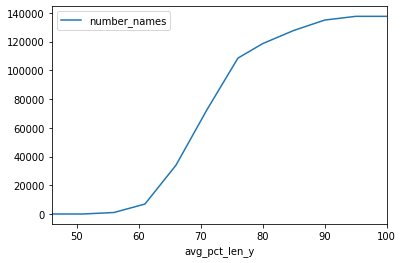

In [41]:
analysis_df_tail.plot(x='avg_pct_len_y', y='number_names')

In [43]:
# It looks to be approximately that the decision boundary is 70%
# I will calculate the actual decision boundary later
from approx_match_list import approx_match_list

In [59]:
name_list = pd.read_csv('INSURANCE_CARRIERNAMES.csv')
approx_match_names = approx_match_list(name_list['COMPANYNAME'].to_list(), 0.70)

In [60]:
approx_match_names

['1st community insurance services',
 '360 coverage',
 '360 coverage pro',
 '360 coverage pros',
 '360 degree coverage pros',
 'Willis Fee',
 'aaa life insurance co.',
 'aaic',
 'abi administrative services',
 'accord insurance',
 'ace american insurance company',
 'ace financial group',
 'ace financial group ltd',
 'acord',
 'admiral indemnity company',
 'admiral insurance co',
 'admiral insurance company',
 'aeon risk services northeast, inc',
 'affinity insurance service',
 'aggressive insurance service llc',
 'aggressive insurance services, llc',
 'aif- agency ins & financial',
 'aig life insurance co.',
 'aig specialty insurance company',
 'ajg gallager-affinity',
 'allen & associates',
 'alliant',
 'allianz global risks us insurance co',
 'allianz underwriters insurance company',
 'allied world assurance ins co',
 'allied world insurance company',
 'allied world specialty insurance company',
 'allied world surplus lines insurance',
 'allied world surplus lines insurance company',

In [61]:
len(name_list['COMPANYNAME'].to_list())

371

In [62]:
len(approx_match_names)

365

In [77]:
split_names = [name.split() for name in approx_match_names]
empty_list = []
full_names = []

In [78]:
for name, split in zip(approx_match_names,split_names):
    if len(split) > 3 or len(split) == 1:
        full_names.append(name)
    else:
        empty_list.append(name)

In [79]:
full_names

['1st community insurance services',
 '360 degree coverage pros',
 'aaa life insurance co.',
 'aaic',
 'ace american insurance company',
 'ace financial group ltd',
 'acord',
 'aeon risk services northeast, inc',
 'aggressive insurance service llc',
 'aggressive insurance services, llc',
 'aif- agency ins & financial',
 'aig life insurance co.',
 'aig specialty insurance company',
 'alliant',
 'allianz global risks us insurance co',
 'allianz underwriters insurance company',
 'allied world assurance ins co',
 'allied world insurance company',
 'allied world specialty insurance company',
 'allied world surplus lines insurance',
 'allied world surplus lines insurance company',
 'american administrative group (tpa)',
 'american alternative insurance company',
 'american alternative insurance corporation',
 'american auto ins company',
 'american automobile insurance company',
 'american capitol insurance co.',
 'american endurance specialty ins co',
 'american family home insurance compan